<a href="https://colab.research.google.com/github/Slimani-CE/diebetes-prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Importing the dataset

In [96]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset shape

In [97]:
dataset.shape

(768, 9)

# Data analysis

In [98]:
target = 'Outcome'
features = dataset.columns.drop(target)

## Dataset descreption

In [99]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Target value count

In [100]:
target_count_df = dataset[target].value_counts().to_frame()
target_count_df.columns = ["count"]
target_count_df

,count
0,500
1,268


## Features mean value by target value

In [101]:
dataset.groupby(by = target).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Number of classes(unique values) of each feature

In [102]:
nunique_df = dataset.nunique().to_frame()
nunique_df.columns = ['Unique values count']
nunique_df

,Unique values count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [103]:
dataset.groupby(by = 'Pregnancies')[target].agg(['count', 'mean']).sort_values(by = 'count').T

Pregnancies,17,15,14,12,13,11,10,9,8,7,6,5,4,3,2,0,1
count,1.0,1.0,2.0,9.000000,10.0,11.000000,24.000000,28.000000,38.000000,45.000000,50.00,57.000000,68.000000,75.00,103.000000,111.000000,135.000000
mean,1.0,1.0,1.0,0.444444,0.5,0.636364,0.416667,0.642857,0.578947,0.555556,0.32,0.368421,0.338235,0.36,0.184466,0.342342,0.214815


## Correlation with target value

<Axes: >

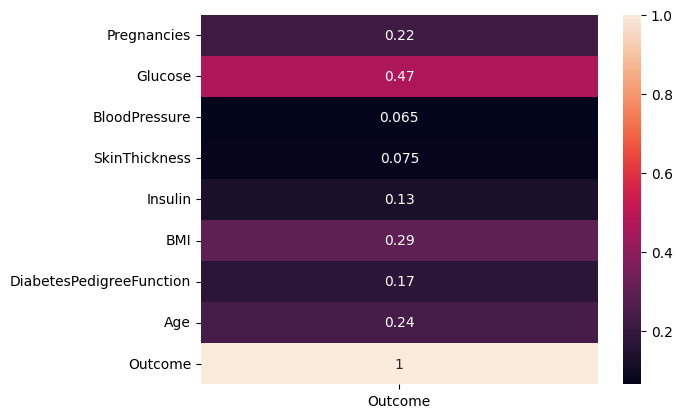

In [104]:
sms.heatmap(data = dataset.corr()[target].to_frame(), annot = True)

# Training SVM model

## Separate features and target value

In [105]:
X = dataset.drop(columns = target)
y = dataset[target]

## Feature scaling

In [106]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Split dataset into training and test set

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

## Training the model

In [108]:
classifier = SVC(kernel = "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate the model

### Make predictions

In [109]:
y_pred = classifier.predict(X_test)

### Accuracy score

In [110]:
train_accuracy_score = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy_score = accuracy_score(y_test, y_pred)
print(f'Train accuracy score: {train_accuracy_score}')
print(f'Test accuracy score : {test_accuracy_score}')

Train accuracy score: 0.7915309446254072
Test accuracy score : 0.7207792207792207


### Confusion matrix

In [111]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83 17]
 [26 28]]


# Predictive system

In [120]:
input_data = (6,	148,	72,	35,	0, 33.6,	0.627,	50)

input_data_pn_array = np.asarray(input_data).reshape(1, -1)

input_data_pn_array = scaler.transform(input_data_pn_array)

prediction = classifier.predict(input_data_pn_array)

print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
